# TensorFlow Practice + Streamlit Demo
This notebook solves a simple computer vision problem. Once complete, I will try and make it into an interactive demo using Streamlit.

1. Data and Preprocessing
2. Modelling
3. finish this later...

## 1. Data

In [63]:
import requests
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as kerasimg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
r = requests.get(url, allow_redirects=True)

open('cats_and_dogs.zip', 'wb').write(r.content)

68606236

In [3]:
local_zip = 'cats_and_dogs.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall()
zip_ref.close()

In [4]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 10s - loss: 0.6840 - accuracy: 0.6265 - val_loss: 0.6021 - val_accuracy: 0.6760
Epoch 2/15
100/100 - 3s - loss: 0.5902 - accuracy: 0.6910 - val_loss: 0.5849 - val_accuracy: 0.6820
Epoch 3/15
100/100 - 3s - loss: 0.5054 - accuracy: 0.7595 - val_loss: 0.5889 - val_accuracy: 0.7180
Epoch 4/15
100/100 - 3s - loss: 0.4198 - accuracy: 0.8075 - val_loss: 0.5750 - val_accuracy: 0.7460
Epoch 5/15
100/100 - 3s - loss: 0.3222 - accuracy: 0.8605 - val_loss: 0.6466 - val_accuracy: 0.7260
Epoch 6/15
100/100 - 3s - loss: 0.2425 - accuracy: 0.9015 - val_loss: 0.6235 - val_accuracy: 0.7290
Epoch 7/15
100/100 - 3s - loss: 0.1562 - accuracy: 0.9380 - val_loss: 0.9129 - val_accuracy: 0.7070
Epoch 8/15
100/100 - 3s - loss: 0.1079 - accuracy: 0.9570 - val_loss: 1.2344 - val_accuracy: 0.7000
Epoch 9/15
100/100 - 4s - loss: 0.0663 - accuracy: 0.9745 - val_loss: 1.4490 - val_accuracy: 0.6970
Epoch 10/15
100/100 - 3s - loss: 0.0599 - accuracy: 0.9800 - val_loss: 1.3363 - val_accuracy: 0.714

In [44]:
tf.keras.models.save_model(model,'cat_dog_classifier.hdf5')

In [17]:
from PIL import Image

In [42]:
def image_to_array(image):
    
    im_arr = np.frombuffer(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3))          
    
    return im_arr

In [60]:
# Make prediction

image_path = 'cats_and_dogs_filtered/train/dogs/' + 'dog.189.jpg'
with Image.open(image_path) as image:
    image_array = image_to_array(image)

image_sized = np.resize(image_array, (150, 150, 3))
image_ready = np.expand_dims(image_sized, axis=0)

result = model.predict(image_ready)

if result > 0:
    print("It's a dog")

else:
    print("It's a cat")

It's a cat


It's a dog


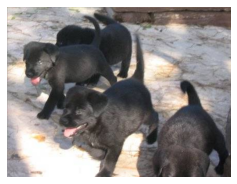

In [66]:
# Make prediction
path = 'cats_and_dogs_filtered/train/dogs/' + 'dog.189.jpg'
img = kerasimg.load_img(path, target_size=(150, 150))


x = kerasimg.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0]>0:
    print("It's a dog")

else:
    print("It's a cat")
    
# Show the image
fig = plt.gcf()
fig.set_size_inches(4, 4)
plt.axis('Off')

img = mpimg.imread(path)
plt.imshow(img)
plt.show()

In [68]:
from pyngrok import ngrok

In [86]:
tunnels = ngrok.get_tunnels()
tunnels

[]

In [85]:
ngrok.disconnect("https://05750fde257b.ngrok.io")

In [87]:
url = ngrok.connect(8501)
url

<NgrokTunnel: "http://f93ac317d0ab.ngrok.io" -> "http://localhost:8501">